1a. [5pts, HELP] Suppose that an ant wandered randomly by taking steps (x,y), one per second, where
at each ant step, x and y each come from a normal distribution with a mean of 0 and a standard
deviation of 1.0mm (assume this for all questions below). Plot a trace of the ant’s path over the course
of an hour.

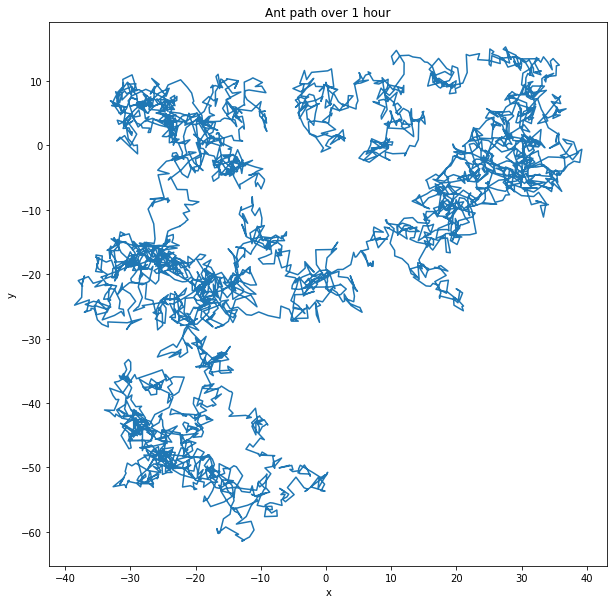

In [22]:
#1a
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

pathx = np.cumsum(np.random.normal(0, 1, 3600))
pathy = np.cumsum(np.random.normal(0, 1, 3600))

plt.figure(figsize = (10, 10))
plt.plot(pathx, pathy)
plt.title('Ant path over 1 hour')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

1b. [10pts, HELP]  Let’s think about why ants need to perform path integration. Suppose that instead of path integration, when an ant found food, it just continued to wander with random steps until it got back to the nest. Using a simulation, estimate the probability that an ant who finds food after 1 hour will make its way back to within 5mm of the nest over the course of the next hour (note that if it comes within 5mm of a nest, it stops). How many simulations do you need to run? Do the results show that this is a good strategy? Why or why not?

In [53]:
#1b
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def simulate():
    pathx = np.cumsum(np.random.normal(0, 1, 3600))
    pathy = np.cumsum(np.random.normal(0, 1, 3600))
    x = pathx[3599]
    y = pathy[3599]
    i = 0
    while (i < 3600):
        nextx = np.random.normal(0, 1)
        nexty = np.random.normal(0, 1)
        x += nextx
        y += nexty
        distance2nest = np.sqrt(np.square(x) + np.square(y))
        if distance2nest <= 5:
            return 1
        i += 1
    return 0

trials = 1000
success = 0
prob = 0

for i in range(trials):
    success += simulate()

prob = success/trials
print(prob)

#I ran 1000 trials and received a consistent p value each time.
#The results show that this strategy works about 13-15% of the time.
#According to these findings, I don't believe this is a good strategy.
#It is far too unreliable and doesn't utilize any sort of "learning"
#to speed up the process.


0.135


1c. [10pts, SOLO] If the ant searches for an hour, finds food, and then searches for the nest by continuing to walk at random, on average, what is the closest distance it will come to the nest over the course of the next hour? (Do not assume it stops if it comes within 5mm) Find this average distance with a simulation.

In [51]:
#1c
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

time = 0

nestx = 0
nesty = 0

def simulate():
    i = 1
    pathx = np.cumsum(np.random.normal(0, 1, 3600))
    pathy = np.cumsum(np.random.normal(0, 1, 3600))
    curr_x = pathx[3599]
    curr_y = pathy[3599]
    closestdist = np.sqrt(np.square(curr_x) + np.square(curr_y))
    while (i < 3600):
        stepx = np.random.normal(0, 1)
        stepy = np.random.normal(0, 1)
        curr_x += stepx
        curr_y += stepy
        distance2nest = np.sqrt(np.square(curr_x) + np.square(curr_y))
        if distance2nest <= closestdist:
            closestdist = distance2nest
        i += 1
    return closestdist

trials = 500
success = 0
closest_distances = []

for i in range(trials):
    closest_distances.append(simulate())

average = (np.sum(closest_distances)/trials)
print(average)

47.87249868582115


25pts, HELP] Now let’s think about path integration. Assume that each step (x,y) is “remembered” (integrated) internally in the ant’s brain with a standard deviation on each component. Thus, if we store the total X component, it gets updated with a new x step via X ← X+x+ex where ex ~ Normal(0,S) and similarly for Y (Y ← Y+y+ ey with ey ~ Normal(0,S)). Suppose that, upon finding food after an hour (asabove, one step per second), the ant then heads straight back to where it thinks the nest is (e.g. it travelsback via the vector (-X,-Y)). Thus, the outbound trip is noisy, but the return trip is noiseless. Simulate to see how far the ant will end from the nest for various S from 1.0mm down to 0.0001mm. Plot the mean distance the ant ends from the nest as a function of S. Be sure to show a range of S values that make it clear what’s going on. 

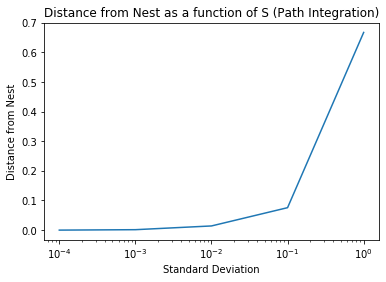

In [108]:
#2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

time = 0
nestx = 0
nesty = 0
stdev = [1, 0.1, 0.01, 0.001, 0.0001]

def simulate(stdev):
    
    i = 1
    noisy_pathx = []
    noisy_pathy = []
    noiseless_pathx = np.cumsum(np.random.normal(0, 1, 3600))
    noiseless_pathy = np.cumsum(np.random.normal(0, 1, 3600))
    
    for i in range(3600):
        noisy_pathx.append(noiseless_pathx[i] + np.random.normal(0, stdev))
        noisy_pathy.append(noiseless_pathy[i] + np.random.normal(0, stdev))
   
    x_noise = noisy_pathx[3599] - noiseless_pathx[3599]
    y_noise = noisy_pathy[3599] - noiseless_pathy[3599]
    distance2nest = np.sqrt(np.square(x_noise) + np.square(y_noise))
    return distance2nest   

distances =[]
for i in range(len(stdev)):
    distances.append(simulate(stdev[i]))


plt.plot(stdev, distances)
plt.xlabel("Standard Deviation")
plt.ylabel("Distance from Nest")
plt.title("Distance from Nest as a function of S (Path Integration)")
plt.xscale("log")

3a. [20pts, SOLO] Next, let’s just assume that it requires exp(0.1/S) energy units to run an integrator with a standard deviation of S for an hour. Suppose further that if you end up at a distance d from the nest after your return trip, it will take you d2 energy units to find the nest. Plot the average energy expended while on a foraging trip (out for an hour and back) as a function of S. Be sure you have founda range of S to plot that shows the shape of the curve near its minimum.


[3395679.2304007434, 1303.1153887479838, 11.90173596395493, 4.298071189594928, 5.441994772728245, 14.797035473766124, 44052.933106090626, 970330390.8195941, 5.376234283632271e+43]


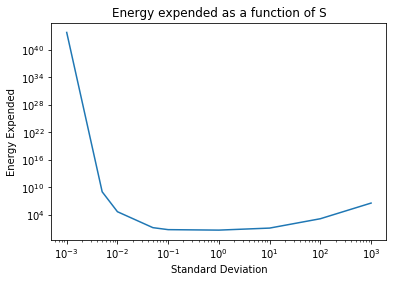

In [129]:
#3a
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

time = 0
nestx = 0
nesty = 0
stdev = [1000, 100, 10, 1, .1, .05, .01, .005, .001]

def simulate(stdev):
    
    i = 1
    noisy_pathx = []
    noisy_pathy = []
    noiseless_pathx = np.cumsum(np.random.normal(0, 1, 3600))
    noiseless_pathy = np.cumsum(np.random.normal(0, 1, 3600))
    
    for i in range(3600):
        noisy_pathx.append(noiseless_pathx[i] + np.random.normal(0, stdev))
        noisy_pathy.append(noiseless_pathy[i] + np.random.normal(0, stdev))
   
    x_noise = noisy_pathx[3599] - noiseless_pathx[3599]
    y_noise = noisy_pathy[3599] - noiseless_pathy[3599]
    distance2nest = np.sqrt(np.square(x_noise) + np.square(y_noise))
    energycost = 2 * np.exp(0.1/stdev) + np.square(distance2nest)
    return energycost   

energy =[]
for i in range(len(stdev)):
    energy.append(simulate(stdev[i]))


plt.plot(stdev, energy)
plt.xlabel("Standard Deviation")
plt.ylabel("Energy Expended")
plt.title("Energy expended as a function of S")
plt.xscale("log")
plt.yscale("log")
print(energy)

#3b
The significance of the minimum of the plot in 3a seems to suggest that the energy expended is lowest when the standard deviation is close to 10^0, or 1. That means that the energy expended by the ant in our model is least when the normal distribution being sampled from is closest to "standard normal" (aka, mean = 0, standard deviation = 1). Evolutionarily, this implies that the ants are most energy efficient (and therefore 'healthier' and able to survive longer) when the normal distribution is closest to a standard normal distribution, which makes sense as to why many natural phenomena correlate with this kind of normal distribution bell curve. This might also imply that ants using path integration have an innate ability to act with a standard deviation of 1.